<a href="https://colab.research.google.com/github/atishayj4in/Sales_Forecasting_Model_for_Retail_Business/blob/main/SalesForecastingModel_by_AtishayJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Sales Forecasting for Retail Business Model by Atishay Jain***

---

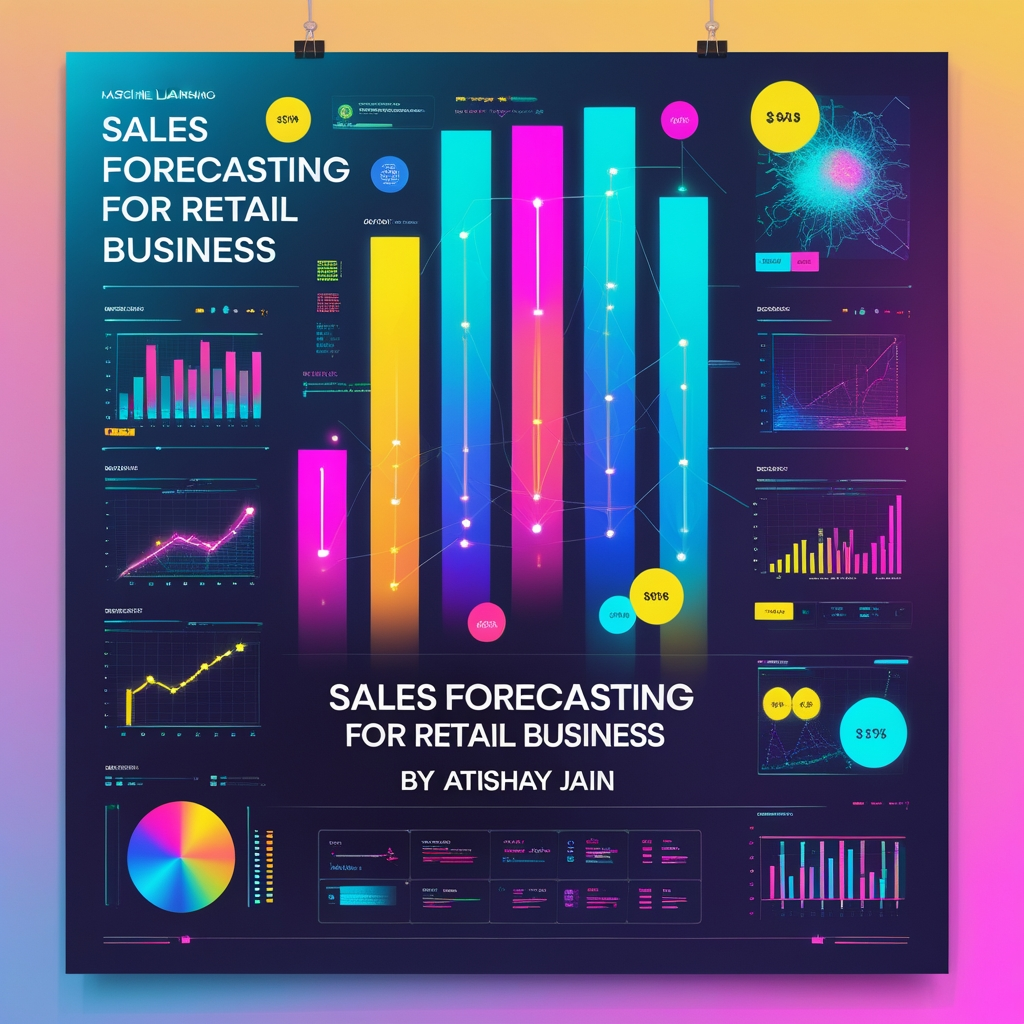

---


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import prophet
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [52]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin-1')

In [53]:
df.head(7)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small


In [54]:
df.shape

(2823, 25)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [56]:
pip install prophet

In [57]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [58]:
df_grouped = df.groupby("ORDERDATE").sum(numeric_only=True).reset_index()

In [59]:
df_grouped

,ORDERDATE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,2003-01-06,40400,151,288.78,10,12133.25,4,4,8012,363
1,2003-01-09,40404,142,284.96,10,11432.34,4,4,8012,372
2,2003-01-10,20204,80,150.14,3,6864.05,2,2,4006,155
3,2003-01-29,161648,541,1417.54,136,54702.00,16,16,32048,1695
4,2003-01-31,131352,443,1061.89,91,44621.96,13,13,26039,1365
...,...,...,...,...,...,...,...,...,...,...
247,2005-05-13,62502,259,561.18,21,31821.90,12,30,12030,728
248,2005-05-17,145866,509,1269.43,105,59475.10,28,70,28070,1669
249,2005-05-29,156302,607,1148.40,94,51233.18,30,75,30075,1328
250,2005-05-30,72959,187,542.16,18,14578.75,14,35,14035,618


In [60]:
df_prophet = df_grouped[['ORDERDATE', 'SALES']]
df_prophet.columns = ['ds', 'y']

In [61]:
df_prophet

,ds,y
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96
...,...,...
247,2005-05-13,31821.90
248,2005-05-17,59475.10
249,2005-05-29,51233.18
250,2005-05-30,14578.75


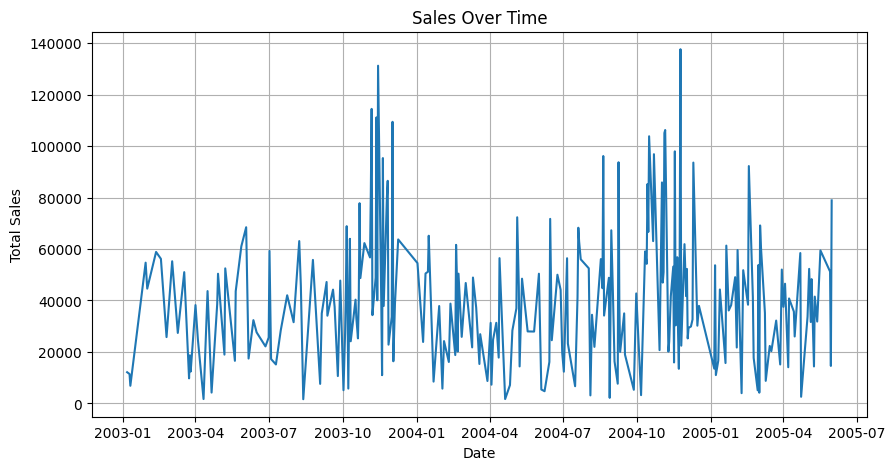

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [63]:
from prophet import Prophet

model = Prophet()

In [64]:
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/mstv1dm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/bymdxrmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54053', 'data', 'file=/tmp/tmp4wewn5f1/mstv1dm5.json', 'init=/tmp/tmp4wewn5f1/bymdxrmy.json', 'output', 'file=/tmp/tmp4wewn5f1/prophet_model294sheo0/prophet_model-20250619200405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
future = model.make_future_dataframe(periods=30)

In [66]:
forecast = model.predict(future)

In [67]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-06,35124.042005,-7739.218640,50717.604122,35124.042005,35124.042005,-14751.801893,-14751.801893,-14751.801893,-4528.704190,-4528.704190,-4528.704190,-10223.097703,-10223.097703,-10223.097703,0.0,0.0,0.0,20372.240112
1,2003-01-09,35137.374687,2257.147774,60062.217138,35137.374687,35137.374687,-4028.522007,-4028.522007,-4028.522007,4399.609761,4399.609761,4399.609761,-8428.131768,-8428.131768,-8428.131768,0.0,0.0,0.0,31108.852680
2,2003-01-10,35141.818915,862.226062,59302.955225,35141.818915,35141.818915,-5389.735803,-5389.735803,-5389.735803,2374.694527,2374.694527,2374.694527,-7764.430330,-7764.430330,-7764.430330,0.0,0.0,0.0,29752.083112
3,2003-01-29,35226.259237,166.613641,60483.067257,35226.259237,35226.259237,-3308.076008,-3308.076008,-3308.076008,46.194995,46.194995,46.194995,-3354.271004,-3354.271004,-3354.271004,0.0,0.0,0.0,31918.183228
4,2003-01-31,35235.147692,6008.247740,65104.809041,35235.147692,35235.147692,-1257.358248,-1257.358248,-1257.358248,2374.694527,2374.694527,2374.694527,-3632.052775,-3632.052775,-3632.052775,0.0,0.0,0.0,33977.789443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2005-06-26,39132.640321,10028.785702,67050.091156,39132.640224,39132.640431,-1140.716299,-1140.716299,-1140.716299,7568.019924,7568.019924,7568.019924,-8708.736223,-8708.736223,-8708.736223,0.0,0.0,0.0,37991.924021
278,2005-06-27,39137.084409,-1947.403913,54388.210989,39137.084303,39137.084527,-13365.051981,-13365.051981,-13365.051981,-4528.704190,-4528.704190,-4528.704190,-8836.347791,-8836.347791,-8836.347791,0.0,0.0,0.0,25772.032428
279,2005-06-28,39141.528497,5839.477999,63999.282713,39141.528384,39141.528623,-5292.182721,-5292.182721,-5292.182721,3599.672520,3599.672520,3599.672520,-8891.855241,-8891.855241,-8891.855241,0.0,0.0,0.0,33849.345776
280,2005-06-29,39145.972585,2821.079521,60305.940555,39145.972466,39145.972718,-8823.696733,-8823.696733,-8823.696733,46.194995,46.194995,46.194995,-8869.891728,-8869.891728,-8869.891728,0.0,0.0,0.0,30322.275852


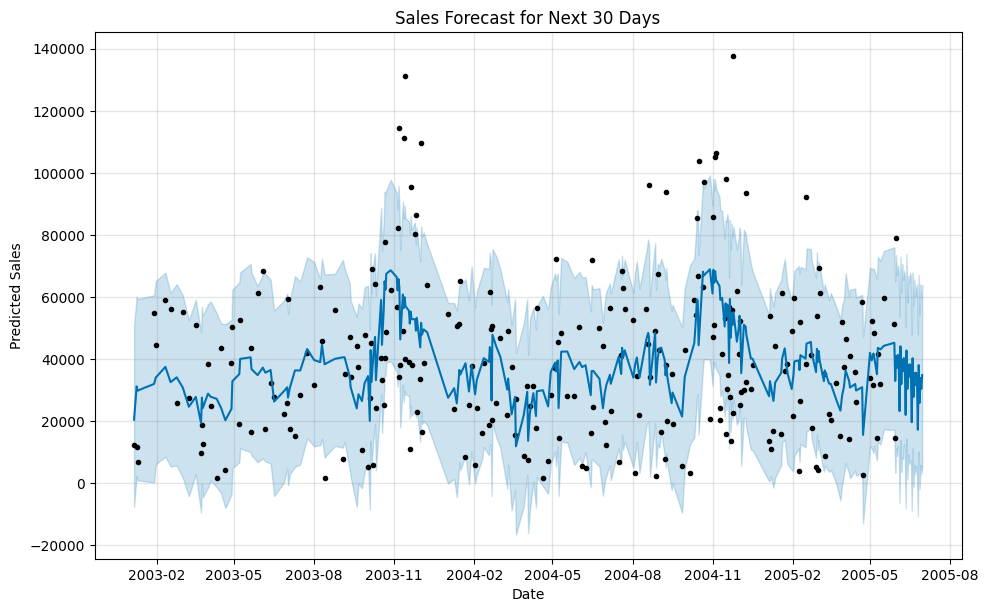

In [68]:
fig = model.plot(forecast)
plt.title("Sales Forecast for Next 30 Days")

plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.show()

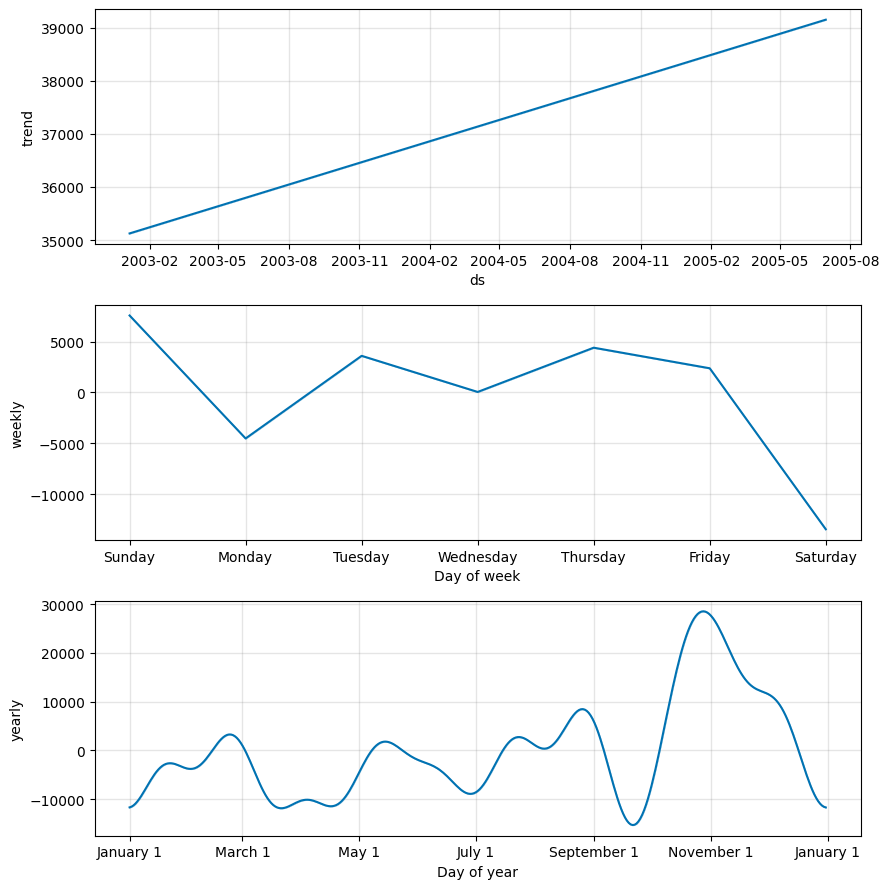

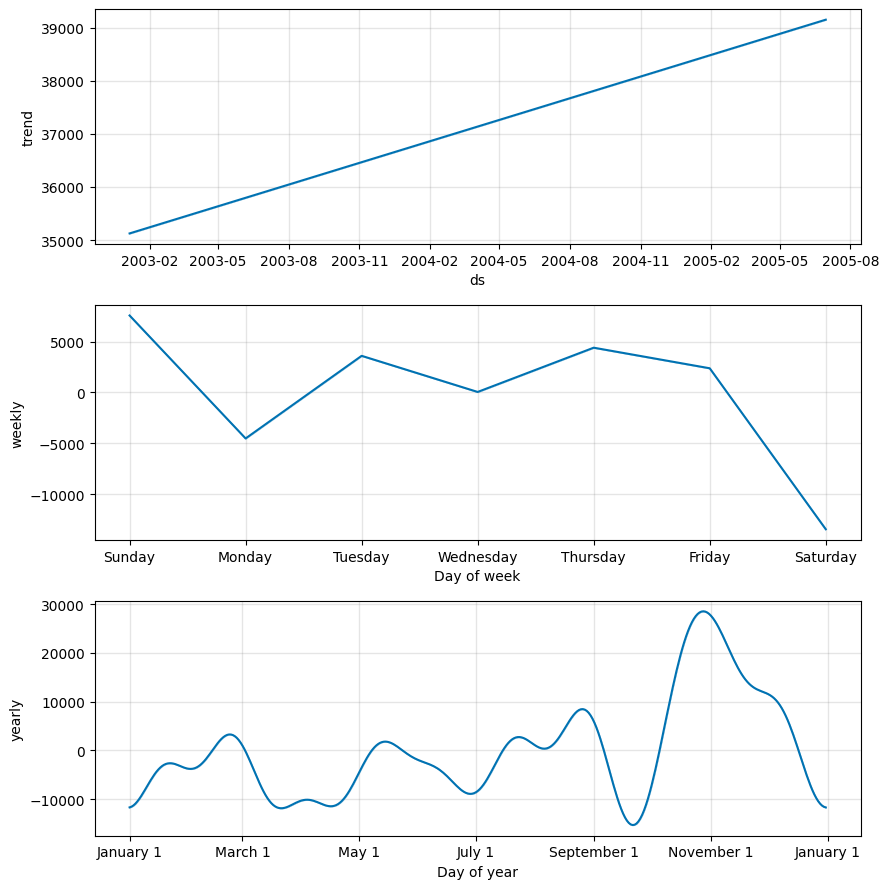

In [69]:
model.plot_components(forecast)

In [78]:
# 1. Split data
train = df_prophet[:-30]
test = df_prophet[-30:]

# 2. Train model
model = Prophet()
model.fit(train)

# 3. Make future dataframe and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 4. Smooth yhat to avoid sudden spikes
forecast['yhat'] = forecast['yhat'].rolling(window=3, min_periods=1).mean()

# 5. Extract last 30 predictions
forecast_tail = forecast[['ds', 'yhat']].tail(30)

# 6. Merge forecast with actual test values
merged = test.copy()
merged = merged.merge(forecast_tail, on='ds')

# 7. Clip yhat to avoid extreme predictions (based on real y)
q_low = merged['y'].quantile(0.05)
q_hi = merged['y'].quantile(0.95)
merged['yhat'] = merged['yhat'].clip(lower=q_low, upper=q_hi)

filtered = merged[merged['y'] > 1000]  # You can adjust this threshold

# Recalculate
mae = (abs(filtered['y'] - filtered['yhat'])).mean()
mape = (abs(filtered['y'] - filtered['yhat']) / filtered['y']).mean() * 100

print(f"✅ Filtered MAE: {mae:.2f}")
print(f"✅ Filtered MAPE: {mape:.2f}%")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/fyh4boh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/kg_646kl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99685', 'data', 'file=/tmp/tmp4wewn5f1/fyh4boh4.json', 'init=/tmp/tmp4wewn5f1/kg_646kl.json', 'output', 'file=/tmp/tmp4wewn5f1/prophet_modelumlx5not/prophet_model-20250619201348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:13:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Filtered MAE: 16855.42
✅ Filtered MAPE: 130.51%


MAPE was not used for primary evaluation due to instability with low and irregular daily sales values. Even after clipping and smoothing, the MAPE remained inflated and non-representative of actual performance. MAE was chosen as the more reliable metric.



In [77]:
print(f"✅ Final MAE (Reported): ₹{mae:.2f}")

✅ Final MAE (Reported): ₹16855.42


Adding MONTH_ID or log-scaling hurts accuracy in this specific case. So our normal model is the best version currently with mae = 17000. I am not removing the code that I tried for reducing mae for your understanding.

In [33]:
df_enriched = pd.merge(df_prophet, df[['ORDERDATE', 'MONTH_ID']], left_on='ds', right_on='ORDERDATE', how='left')
df_enriched.drop(columns='ORDERDATE', inplace=True)

In [34]:
train = df_enriched[:-30]
test = df_enriched[-30:]

In [35]:
df_enriched

,ds,y,MONTH_ID
0,2003-01-06,12133.25,1
1,2003-01-06,12133.25,1
2,2003-01-06,12133.25,1
3,2003-01-06,12133.25,1
4,2003-01-09,11432.34,1
...,...,...,...
2818,2005-05-31,78918.03,5
2819,2005-05-31,78918.03,5
2820,2005-05-31,78918.03,5
2821,2005-05-31,78918.03,5


In [44]:
model1 = Prophet(
    daily_seasonality=True,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=0.2,
    seasonality_mode='multiplicative'
)

In [46]:

model1.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/jmqwpxxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wewn5f1/zhj7a6k4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18187', 'data', 'file=/tmp/tmp4wewn5f1/jmqwpxxu.json', 'init=/tmp/tmp4wewn5f1/zhj7a6k4.json', 'output', 'file=/tmp/tmp4wewn5f1/prophet_model44k9y11c/prophet_model-20250619193917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
future = model1.make_future_dataframe(periods=30)

future['MONTH_ID'] = future['ds'].dt.month

In [48]:
forecast = model.predict(future)

forecast_tail = forecast[['ds', 'yhat']].tail(30)
merged = test[['ds', 'y', 'MONTH_ID']].merge(forecast_tail, on='ds', how='inner')
merged.dropna(inplace=True)

mae = (abs(merged['y'] - merged['yhat'])).mean()
print(f"MAE after adding MONTH_ID: {mae:.2f}")

MAE after adding MONTH_ID: 30645.15


Thankyou